In [1]:
import os
import sys
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from benatools.tools import MultiStratifiedKFold
from benatools.gbm.fitter import GBMFitter
from benatools.gbm.opt import opt_catboost, opt_xgboost, opt_lightgbm
import sklearn.metrics as mt
from sklearn.model_selection import train_test_split

# Load data and convert to DataFrame
data = load_boston()
df = pd.DataFrame(data=np.concatenate([data['data'], data['target'].reshape(-1,1)], axis=1), columns=list(data['feature_names'])+['TARGET'] )

# Convert boolean and integer variables
df['RAD'] = df['RAD'].astype(int)
df['CHAS'] = df['CHAS'].astype(int)

df.describe()

ImportError: cannot import name 'factorial'

In [ ]:
# Train/Test split
train, test = train_test_split(df)
train = train.reset_index(drop=True)
X_train, y_train = train.iloc[:,:-1], train['TARGET']
X_test, y_test = test.iloc[:,:-1], test['TARGET']

In [ ]:
cb_params = [opt_catboost(X_train, y_train, verbose=2, n_trials=10, max_rounds=500, figsize=(10,6))]

Train Loss: 1.6702, Test Loss: 3.4036 RMSE with 435 iterations. Time elapsed 4.35
Train Loss: 3.2245, Test Loss: 3.9428 RMSE with 499 iterations. Time elapsed 5.01
Train Loss: 1.7562, Test Loss: 3.4614 RMSE with 118 iterations. Time elapsed 1.52
Train Loss: 2.0497, Test Loss: 3.5915 RMSE with 499 iterations. Time elapsed 4.76
Train Loss: 1.9387, Test Loss: 3.4503 RMSE with 499 iterations. Time elapsed 5.1
Train Loss: 3.2009, Test Loss: 3.8975 RMSE with 499 iterations. Time elapsed 4.99
Train Loss: 2.8953, Test Loss: 3.7399 RMSE with 499 iterations. Time elapsed 4.76
Train Loss: 2.2984, Test Loss: 3.6501 RMSE with 498 iterations. Time elapsed 4.97
Train Loss: 2.6556, Test Loss: 3.6398 RMSE with 392 iterations. Time elapsed 4.17
Train Loss: 1.5138, Test Loss: 3.3860 RMSE with 424 iterations. Time elapsed 4.77
100%|██████████| 10/10 [00:44<00:00,  4.44s/trial, best loss: 3.3859776666666668]


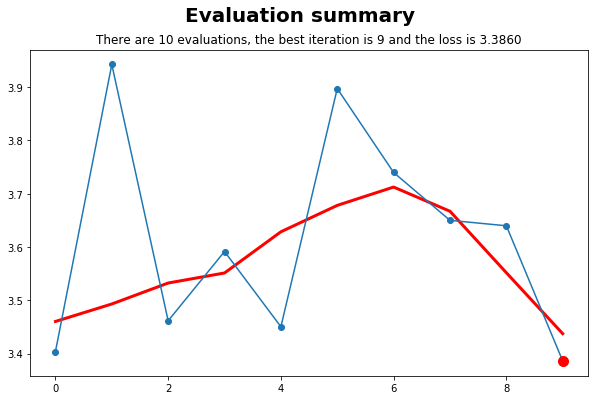

In [11]:
xgb_params = [opt_xgboost(X_train, y_train, verbose=2, n_trials=10, max_rounds=500, figsize=(10,6))]

Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01
Test Loss: 5.6306 RMSE with 446 iterations. Time elapsed 0.14                  
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01                   
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01                   
Test Loss: 5.7794 RMSE with 170 iterations. Time elapsed 0.04                  
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01                   
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01                   
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01                   
Test Loss: 24.6128 RMSE with 0 iterations. Time elapsed 0.01                   
100%|██████████| 10/10 [00:00<00:00, 33.49trial/s, best loss: 5.630629367005088]


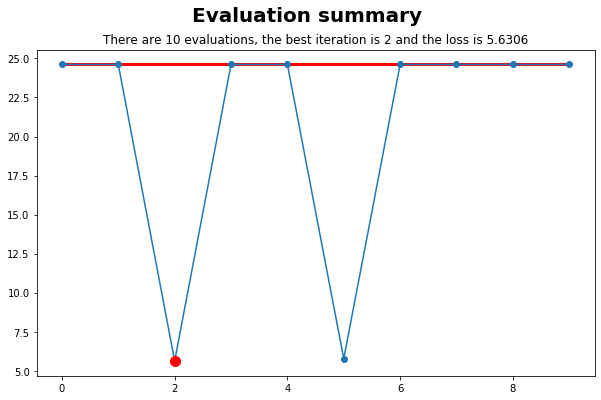

In [12]:
lgb_params = [opt_lightgbm(X_train, y_train, verbose=2, n_trials=10, max_rounds=1500, figsize=(10,6))]

In [16]:
# Create CV strategy
cv = MultiStratifiedKFold(n_splits=5, df=X_train, features=['RAD','CHAS'])
fitter = GBMFitter(cb_data = cb_params, xgb_data = xgb_params, lgb_data = lgb_params, cv_strategy = cv, use_rounders=False, metrics=[mt.mean_squared_error])

In [17]:
fitter.fit(X_train, y_train)

Training CB models
	Training with 5 folds
		Training fold 0 
			Train Metric: 4.4993, OOF Val Metric: 7.9246, elapsed 0.39
		Training fold 1 
			Train Metric: 4.0516, OOF Val Metric: 11.7856, elapsed 0.5
		Training fold 2 
			Train Metric: 3.8750, OOF Val Metric: 15.6451, elapsed 0.46
		Training fold 3 
			Train Metric: 4.4656, OOF Val Metric: 14.7815, elapsed 0.42
		Training fold 4 
			Train Metric: 4.2965, OOF Val Metric: 15.3880, elapsed 0.46
		OOF Validation Metric: 13.1967, total time elapsed 2.24
Training XGB models
	Training with 5 folds
		Training fold 0 
			Train Metric: 2.4873, OOF Val Metric: 7.0496, elapsed 1.6
		Training fold 1 
			Train Metric: 2.4123, OOF Val Metric: 9.6705, elapsed 1.56
		Training fold 2 
			Train Metric: 2.0860, OOF Val Metric: 19.9503, elapsed 1.57
		Training fold 3 
			Train Metric: 2.4029, OOF Val Metric: 10.0591, elapsed 1.57
		Training fold 4 
			Train Metric: 2.2701, OOF Val Metric: 13.2786, elapsed 1.55
		OOF Validation Metric: 12.0628, total ti

In [18]:
y_pred = fitter.predict(X_test, mean_function=np.mean)
y_pred

,cb0,cb1,cb2,cb3,cb4,xgb0,xgb1,xgb2,xgb3,xgb4,lgb0,lgb1,lgb2,lgb3,lgb4,mean
0,23.489156,25.026887,23.910899,23.703797,24.716544,25.601707,26.567877,24.418831,26.664331,25.994114,24.038969,22.838573,23.450531,22.233801,26.340483,24.599767
1,21.568264,21.695085,21.401552,22.186455,22.059180,21.835493,22.247410,22.136982,22.310987,21.043455,20.102230,19.514548,21.108298,20.970362,22.270743,21.496736
2,18.447788,17.673798,17.791614,17.976261,17.327081,18.169054,16.682280,16.549000,17.183353,17.085653,14.916680,16.122143,14.587407,14.777872,15.114755,16.693649
3,14.685916,15.234204,13.869798,14.099419,13.904070,14.166034,16.059315,14.912730,15.340445,14.476507,12.470769,13.599436,12.697845,12.513435,12.064617,14.006303
4,23.884493,23.804751,22.551622,23.318437,23.716565,21.875837,23.917906,22.997105,23.347202,22.785482,25.436315,26.094154,23.775585,23.756182,26.904832,23.877765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,33.171653,32.636984,37.495101,32.416583,33.788965,31.122858,30.833109,32.266079,30.196331,32.107269,29.824353,30.030592,29.745179,30.048004,30.135698,31.721250
123,23.810467,25.665403,23.790510,24.032627,24.734544,24.143007,25.617910,24.119970,25.094929,23.911196,26.313851,26.043947,26.976714,25.606367,27.227127,25.139238
124,12.890055,14.297696,13.458736,12.778762,13.465743,13.376484,14.121161,13.476758,12.454109,12.450480,12.443364,12.892071,11.740493,12.333754,12.042288,12.948130
125,15.034267,14.783799,13.390412,13.560543,13.781469,14.514259,14.494281,14.722704,13.717727,14.816611,14.328595,14.885770,13.992836,13.925160,16.831037,14.451965


In [22]:
print('Test Dataset RMSE {:.4f}'.format(mt.mean_squared_error(y_test, y_pred['mean'], squared=False)))

Test Dataset RMSE 3.8237
